In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('default')
sns.set_palette("husl")

### LOADING DATA [20 Poin]

climate data

In [3]:
df_iklim = pd.read_csv('../../data/normalize/iklim_surabaya_2023.csv')

In [4]:
df_iklim.sample

<bound method NDFrame.sample of         TANGGAL    TN    TX  TAVG  RH_AVG RR   SS  FF_X  DDD_X  FF_AVG DDD_CAR
0    09-08-2023  23.8  32.8  28.1    65.0  0  8.9   8.0  110.0     3.0      E 
1    10-08-2023  23.4  32.4  27.7    60.0  -  8.0   6.0  130.0     3.0      E 
2    11-08-2023  22.2  32.6  27.8    62.0  -  8.8   5.0  100.0     3.0      E 
3    12-08-2023  23.0  33.2  28.3    61.0  0  8.8   8.0   90.0     2.0      C 
4    13-08-2023  23.0  32.7  28.6    64.0  0  8.7   6.0   80.0     2.0      E 
..          ...   ...   ...   ...     ... ..  ...   ...    ...     ...     ...
265  26-09-2023  23.5  35.0  29.3    58.0  0  8.8   7.0  100.0     2.0      E 
266  27-09-2023  23.8  35.0  29.3    61.0  -  9.0   7.0  100.0     3.0      E 
267  28-09-2023  24.0  34.8  29.7    62.0  0  8.8   8.0  110.0     4.0      E 
268  29-09-2023  25.6  34.4  29.9    64.0  0  8.8   9.0  110.0     4.0      E 
269  30-09-2023  25.4  35.0  29.6    60.0  0  8.7   5.0  100.0     2.0      E 

[270 rows x 11 colu

In [5]:
df_iklim.shape

(270, 11)

x data

In [6]:
df_tweets = pd.read_csv('../../data/normalize/tweets_normalized.csv')

In [7]:
df_tweets.sample

<bound method NDFrame.sample of         TANGGAL tweet_id                                         tweet_text
0    2023-01-18   tweet1                                        hujan deres
1    2023-01-18   tweet4                              dengerin suara hujan 
2    2023-01-18   tweet2       hujan petir suara pesawat deket sekali admin
3    2023-01-18   tweet5             hati hati ya pulangnya sedia jas hujan
4    2023-01-18   tweet3                                     surabaya hujan
..          ...      ...                                                ...
101  2023-05-03   tweet4                                      hujan beneran
102  2023-11-28   tweet4  kondisi hujan deras macet berhenti selepas gat...
103  2023-11-28   tweet2                                     terjebak hujan
104  2023-11-28   tweet3                                    hujan jalan tol
105  2023-11-28   tweet1                          adem memasuki musim hujan

[106 rows x 3 columns]>

In [8]:
df_tweets.shape

(106, 3)

Data Side Quests

### DATA CLEANING & PREPROCESSING [30 Poin]

df_iklim

In [9]:
df_iklim['TANGGAL'] = pd.to_datetime(df_iklim['TANGGAL'], format='%d-%m-%Y')

In [10]:
# df_iklim = df_iklim[(df_iklim['TANGGAL'].dt.month >= 1) & 
#                      (df_iklim['TANGGAL'].dt.month <= 2)]

In [11]:
df_iklim

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2023-08-09,23.8,32.8,28.1,65.0,0,8.9,8.0,110.0,3.0,E
1,2023-08-10,23.4,32.4,27.7,60.0,-,8.0,6.0,130.0,3.0,E
2,2023-08-11,22.2,32.6,27.8,62.0,-,8.8,5.0,100.0,3.0,E
3,2023-08-12,23.0,33.2,28.3,61.0,0,8.8,8.0,90.0,2.0,C
4,2023-08-13,23.0,32.7,28.6,64.0,0,8.7,6.0,80.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...
265,2023-09-26,23.5,35.0,29.3,58.0,0,8.8,7.0,100.0,2.0,E
266,2023-09-27,23.8,35.0,29.3,61.0,-,9.0,7.0,100.0,3.0,E
267,2023-09-28,24.0,34.8,29.7,62.0,0,8.8,8.0,110.0,4.0,E
268,2023-09-29,25.6,34.4,29.9,64.0,0,8.8,9.0,110.0,4.0,E


In [12]:
missing_before = df_iklim.isnull().sum().sum()

In [13]:
missing_before

np.int64(11)

In [14]:
numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'FF_AVG', 'DDD_X']

In [15]:
for col in numeric_cols:
    if col in df_iklim.columns:
        df_iklim[col] = pd.to_numeric(df_iklim[col], errors='coerce')
        df_iklim[col] = df_iklim[col].ffill()
        df_iklim[col] = df_iklim[col].bfill()
        df_iklim[col] = df_iklim[col].interpolate(method='linear')
        if df_iklim[col].isnull().sum() > 0:
            df_iklim[col].fillna(df_iklim[col].median(), inplace=True)

In [16]:
if 'DDD_CAR' in df_iklim.columns:
    mode_value = df_iklim['DDD_CAR'].mode()[0] if not df_iklim['DDD_CAR'].mode().empty else 'C'
    df_iklim['DDD_CAR'].fillna(mode_value, inplace=True)


In [17]:
missing_after = df_iklim.isnull().sum().sum()
print(f"\nMissing values after handling: {missing_after}")


Missing values after handling: 1


In [18]:
df_iklim

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...
265,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E
266,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E
267,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E
268,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E


### HERE

In [20]:
#drop row of missing value
rows_before = len(df_iklim)
rows_with_missing = df_iklim[df_iklim.isnull().any(axis=1)]

if len(rows_with_missing) > 0:
    df_iklim = df_iklim.dropna()

In [21]:
missing_after = df_iklim.isnull().sum().sum()
print(f"\nMissing values after handling: {missing_after}")


Missing values after handling: 0


In [22]:
df_iklim

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...
265,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E
266,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E
267,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E
268,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E


df_tweets

In [23]:
df_tweets['TANGGAL'] = pd.to_datetime(df_tweets['TANGGAL'], format='%Y-%m-%d')

In [24]:
df_tweets = df_tweets[(df_tweets['TANGGAL'].dt.month >= 1) & 
                       (df_tweets['TANGGAL'].dt.month <= 2)]

In [25]:
len(df_tweets)

48

In [26]:
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.lower()
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.strip()

In [27]:
df_tweets

,TANGGAL,tweet_id,tweet_text
0,2023-01-18,tweet1,hujan deres
1,2023-01-18,tweet4,dengerin suara hujan
2,2023-01-18,tweet2,hujan petir suara pesawat deket sekali admin
3,2023-01-18,tweet5,hati hati ya pulangnya sedia jas hujan
4,2023-01-18,tweet3,surabaya hujan
5,2023-01-27,tweet2,raya darmo macet hujan deras
6,2023-01-27,tweet5,teruntuk mobil avanzaxenia yang dpn lagoon ave...
7,2023-01-27,tweet1,alhamdulillah hujanya deras tanah basah sampai...
8,2023-01-27,tweet4,hindari jl ketintang macet parah tidak bergera...
9,2023-01-27,tweet3,ngajak kok pas hujan opo ce tidak ketok ngko p...


### DATA INTEGRATION [30 Poin]

In [28]:
#agregate tweet perhari
tweet_agg = df_tweets.groupby('TANGGAL').agg({
    'tweet_id': 'count',
    'tweet_text': lambda x: ' '.join(x)
}).reset_index()

In [29]:
tweet_agg.columns = ['TANGGAL', 'tweet_count', 'tweet_combined']

In [30]:
tweet_agg

,TANGGAL,tweet_count,tweet_combined
0,2023-01-18,5,hujan deres dengerin suara hujan hujan petir s...
1,2023-01-27,5,raya darmo macet hujan deras teruntuk mobil av...
2,2023-02-09,5,sate alhamdulilah hujan diriku memberanikan pu...
3,2023-02-13,6,hujan badai pelangi hujan enak hujan kalau kok...
4,2023-02-20,17,mohon update kondisi berbek industri banjir ah...
5,2023-02-21,7,pulang kerja disambut ayank disambut hujan gin...
6,2023-02-22,3,februari banjir ini juga nostalgia banjir segi...


In [31]:
#ekstraksi fitur dari tweets
tweet_agg['hujan_mention']= tweet_agg['tweet_combined'].str.count('hujan')
tweet_agg['banjir_mention']= tweet_agg['tweet_combined'].str.count('banjir')
tweet_agg['macet_mention']= tweet_agg['tweet_combined'].str.count('macet')
tweet_agg['deras_mention']=tweet_agg['tweet_combined'].str.count('deres') + tweet_agg['tweet_combined'].str.count('deras')

In [32]:
print(f"Tweets aggregated by date: {len(tweet_agg)} days")

Tweets aggregated by date: 7 days


In [33]:
#merge cimate dengan tweets
df_integrated = pd.merge(df_iklim, tweet_agg[['TANGGAL', 'tweet_count', 'hujan_mention',
'banjir_mention', 'macet_mention']], on='TANGGAL', how='left')

In [34]:
df_integrated

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,NaN,NaN,NaN,NaN
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,NaN,NaN,NaN,NaN
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,NaN,NaN,NaN,NaN
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,NaN,NaN,NaN,NaN
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,NaN,NaN,NaN,NaN
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,NaN,NaN,NaN,NaN
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,NaN,NaN,NaN,NaN
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,NaN,NaN,NaN,NaN


In [35]:
#fill NaN untuk hari tanpa tweets
df_integrated[['tweet_count', 'hujan_mention', 'banjir_mention', 'macet_mention']] = \
    df_integrated[['tweet_count', 'hujan_mention', 'banjir_mention', 'macet_mention']].fillna(0)

In [36]:
df_integrated

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,tweet_count,hujan_mention,banjir_mention,macet_mention
0,2023-08-09,23.8,32.8,28.1,65.0,0.0,8.9,8.0,110.0,3.0,E,0.0,0.0,0.0,0.0
1,2023-08-10,23.4,32.4,27.7,60.0,0.0,8.0,6.0,130.0,3.0,E,0.0,0.0,0.0,0.0
2,2023-08-11,22.2,32.6,27.8,62.0,0.0,8.8,5.0,100.0,3.0,E,0.0,0.0,0.0,0.0
3,2023-08-12,23.0,33.2,28.3,61.0,0.0,8.8,8.0,90.0,2.0,C,0.0,0.0,0.0,0.0
4,2023-08-13,23.0,32.7,28.6,64.0,0.0,8.7,6.0,80.0,2.0,E,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2023-09-26,23.5,35.0,29.3,58.0,0.0,8.8,7.0,100.0,2.0,E,0.0,0.0,0.0,0.0
265,2023-09-27,23.8,35.0,29.3,61.0,0.0,9.0,7.0,100.0,3.0,E,0.0,0.0,0.0,0.0
266,2023-09-28,24.0,34.8,29.7,62.0,0.0,8.8,8.0,110.0,4.0,E,0.0,0.0,0.0,0.0
267,2023-09-29,25.6,34.4,29.9,64.0,0.0,8.8,9.0,110.0,4.0,E,0.0,0.0,0.0,0.0


### EXPLORATORY DATA ANALYSIS [20 Poin]

In [37]:
#statistik desktiptif
print(df_integrated[['TAVG', 'RH_AVG', 'RR', 'tweet_count', 'hujan_mention']].describe())

             TAVG      RH_AVG           RR  tweet_count  hujan_mention
count  269.000000  269.000000   269.000000   269.000000     269.000000
mean    29.011524   71.758364   500.182156     0.178439       0.107807
std      1.179733    7.499576  2042.186207     1.294989       0.701474
min     25.900000   58.000000     0.000000     0.000000       0.000000
25%     28.300000   65.000000     0.000000     0.000000       0.000000
50%     28.900000   71.000000     0.000000     0.000000       0.000000
75%     29.700000   78.000000     4.500000     0.000000       0.000000
max     32.300000   90.000000  8888.000000    17.000000       6.000000


In [38]:
#data grouping
print("\n4.2 Data Grouping by Month:")
df_integrated['Month'] = df_integrated['TANGGAL'].dt.month_name()
monthly_stats = df_integrated.groupby('Month').agg({
    'TAVG': 'mean',
    'RR': 'sum',
    'tweet_count': 'sum',
    'hujan_mention': 'sum'
}).round(2)
print(monthly_stats)


4.2 Data Grouping by Month:
            TAVG       RR  tweet_count  hujan_mention
Month                                                
April      29.00   9125.2          0.0            0.0
August     28.41      0.0          0.0            0.0
December   29.88  35652.0          0.0            0.0
February   27.38   9320.6         38.0           20.0
January    27.84   9203.3         10.0            9.0
July       28.20      5.8          0.0            0.0
June       29.11  26664.0          0.0            0.0
March      28.57  17873.9          0.0            0.0
May        29.00   8892.3          0.0            0.0
November   30.58   8923.9          0.0            0.0
October    30.84   8888.0          0.0            0.0
September  29.17      0.0          0.0            0.0


In [43]:
#data Sorting
print("\nTop 5 Hari dengan Curah Hujan Tertinggi:")
top_rain = df_integrated.nlargest(5, 'RR')[['TANGGAL', 'RR', 'tweet_count', 'hujan_mention']]
print(top_rain.to_string(index=False))


Top 5 Hari dengan Curah Hujan Tertinggi:
   TANGGAL     RR  tweet_count  hujan_mention
2023-04-20 8888.0          0.0            0.0
2023-12-09 8888.0          0.0            0.0
2023-12-10 8888.0          0.0            0.0
2023-12-22 8888.0          0.0            0.0
2023-12-31 8888.0          0.0            0.0


In [45]:
#corelation
corr_cols = ['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG', 'tweet_count', 'hujan_mention']
available_cols = [col for col in corr_cols if col in df_integrated.columns]
correlation = df_integrated[available_cols].corr()
print(f"Korelasi RR dengan hujan_mention: {correlation.loc['RR', 'hujan_mention']:.3f}")

Korelasi RR dengan hujan_mention: -0.036


### Visualization

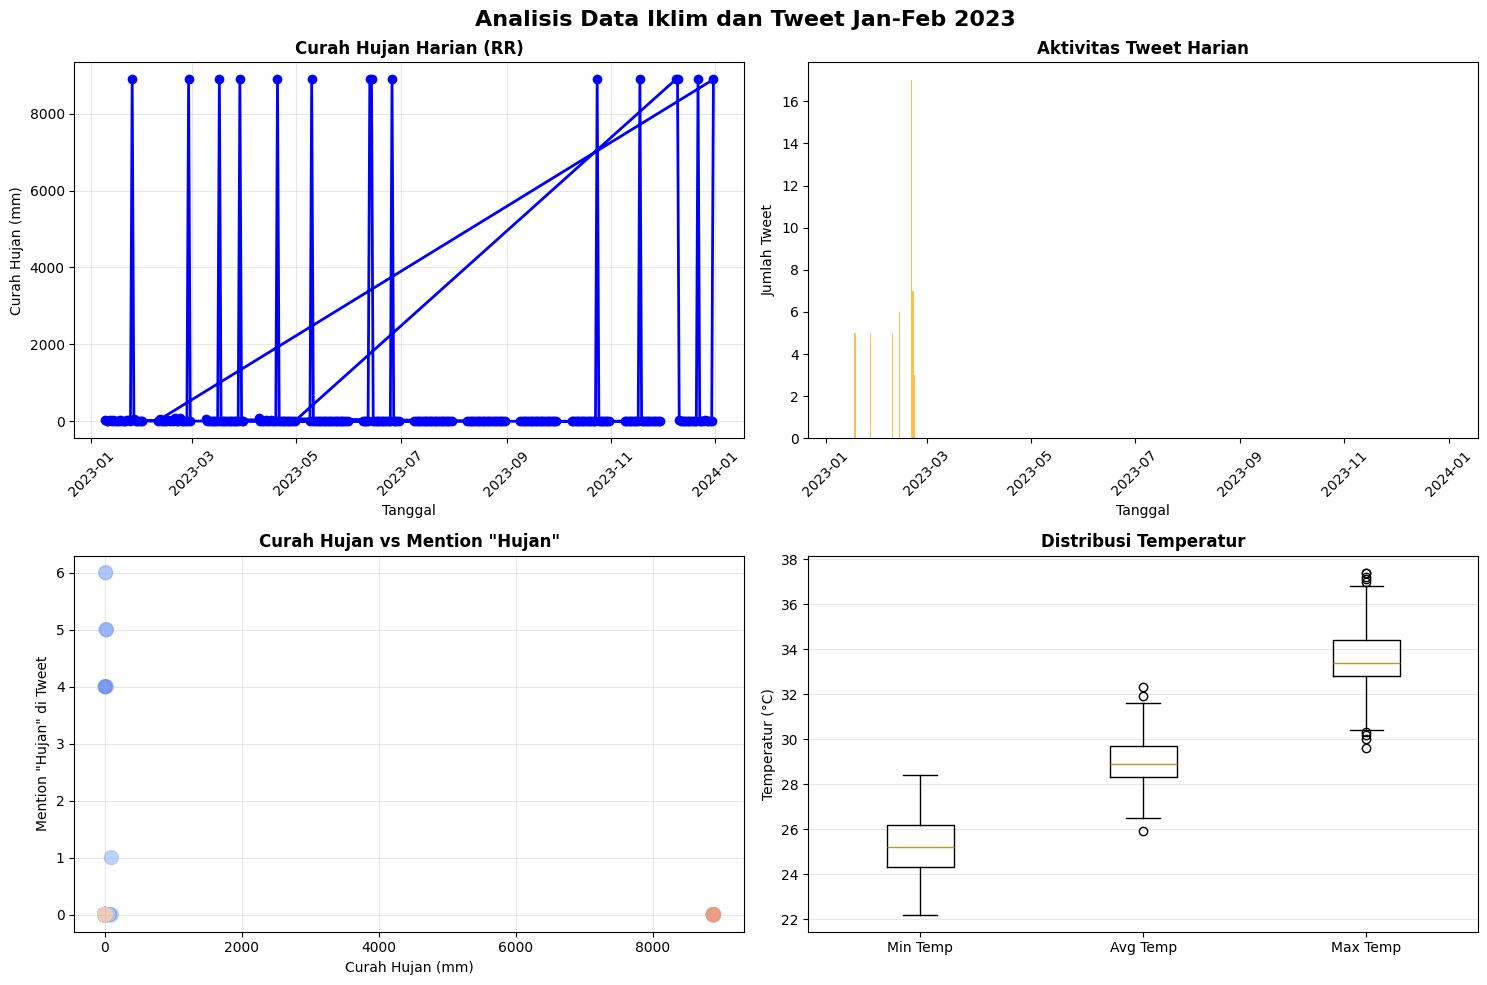

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analisis Data Iklim dan Tweet Jan-Feb 2023', fontsize=16, fontweight='bold')

# Plot 1: Time Series Rainfall
axes[0, 0].plot(df_integrated['TANGGAL'], df_integrated['RR'], marker='o', linewidth=2, color='blue')
axes[0, 0].set_title('Curah Hujan Harian (RR)', fontweight='bold')
axes[0, 0].set_xlabel('Tanggal')
axes[0, 0].set_ylabel('Curah Hujan (mm)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Tweet Activity
axes[0, 1].bar(df_integrated['TANGGAL'], df_integrated['tweet_count'], color='orange', alpha=0.7)
axes[0, 1].set_title('Aktivitas Tweet Harian', fontweight='bold')
axes[0, 1].set_xlabel('Tanggal')
axes[0, 1].set_ylabel('Jumlah Tweet')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Scatter - Rainfall vs Tweets
axes[1, 0].scatter(df_integrated['RR'], df_integrated['hujan_mention'], 
                   s=100, alpha=0.6, c=df_integrated['TAVG'], cmap='coolwarm')
axes[1, 0].set_title('Curah Hujan vs Mention "Hujan"', fontweight='bold')
axes[1, 0].set_xlabel('Curah Hujan (mm)')
axes[1, 0].set_ylabel('Mention "Hujan" di Tweet')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Boxplot Temperature
temp_data = [df_integrated['TN'], df_integrated['TAVG'], df_integrated['TX']]
axes[1, 1].boxplot(temp_data, labels=['Min Temp', 'Avg Temp', 'Max Temp'])
axes[1, 1].set_title('Distribusi Temperatur', fontweight='bold')
axes[1, 1].set_ylabel('Temperatur (°C)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
# plt.savefig('../data/normalize/live_code_analysis.png', dpi=300, bbox_inches='tight')
# print("Visualizations saved")


In [57]:
plt.savefig('../../visualization/live_code_analysis.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

test commit

In [60]:
df_integrated.to_csv('../../data/normalize/integrated_data.csv', index=False)

In [64]:
with open('../../data/normalize/summary_statistics.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("SUMMARY STATISTICS - JAN-FEB 2023\n")
    f.write("NIM: 22031554041\n")
    f.write("="*60 + "\n\n")
    f.write(str(df_integrated.describe()))
    f.write("\n\n")
    f.write("Monthly Aggregation:\n")
    f.write(str(monthly_stats))



print(f"\nFinal Dataset Shape: {df_integrated.shape}")
print(f"Date Range: {df_integrated['TANGGAL'].min()} to {df_integrated['TANGGAL'].max()}")
print(f"Total Rainfall: {df_integrated['RR'].sum():.2f} mm")
print(f"Total Tweets: {df_integrated['tweet_count'].sum():.0f}")


Final Dataset Shape: (269, 16)
Date Range: 2023-01-09 00:00:00 to 2023-12-31 00:00:00
Total Rainfall: 134549.00 mm
Total Tweets: 48
